# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Load the Data

In [2]:
df = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\reviews_data_dump\reviews_badminton\data.csv")

df.head()  #first five rows

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [2]:
df.tail()   #Last five rows

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [3]:
df.shape   #no.of rows and cols

(8518, 8)

In [4]:
df.columns   #cols names

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [5]:
df.describe          #description about the dat

<bound method NDFrame.describe of                Reviewer Name               Review Title   
0               Kamal Suresh               Nice product  \
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place of Review  Up Votes  Down Votes     Month   
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021  \
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0       

In [6]:
#Renaming the Columns
df.columns = df.columns.str.strip()

df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [7]:
df.info()   #Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [8]:
# Check for missing values
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


# Handling missing / Null values

In [9]:
df.fillna({'Reviewer Name': 'Anonymous', 
           'Review Title': 'No Title', 
           'Place of Review': 'Unknown', 
           'Up Votes': df['Up Votes'].median(), 
           'Down Votes': df['Down Votes'].median(), 
           'Month': 'Unknown'}, 
          inplace=True)


In [10]:
# Check for missing values
print(df.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        8
Ratings            0
dtype: int64


In [11]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,5
8514,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,2
8515,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,4
8516,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,1
8517,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,4


In [12]:
# Convert 'Month' column to datetime data type
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

C:\Users\CHARISHMA\AppData\Local\Temp\ipykernel_26372\2687285359.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce')


In [13]:
# Convert 'Up Votes' and 'Down Votes' columns to integer data type
df['Up Votes'] = df['Up Votes'].astype(int)
df['Down Votes'] = df['Down Votes'].astype(int)

In [14]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Check the updated data types and column names
print(df.dtypes)
print(df.columns)

Reviewer_Name              object
Review_Title               object
Place_of_Review            object
Up_Votes                    int32
Down_Votes                  int32
Month              datetime64[ns]
Review_text                object
Ratings                     int64
dtype: object
Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')


# Summary Statistics

In [15]:
print(df.describe())


          Up_Votes   Down_Votes                          Month      Ratings
count  8518.000000  8518.000000                           8053  8518.000000
mean      0.390937     0.121625  2019-12-11 02:10:53.570098432     4.181028
min       0.000000     0.000000            2015-12-01 00:00:00     1.000000
25%       0.000000     0.000000            2018-10-01 00:00:00     4.000000
50%       0.000000     0.000000            2020-02-01 00:00:00     5.000000
75%       0.000000     0.000000            2021-02-01 00:00:00     5.000000
max     889.000000   219.000000            2022-11-01 00:00:00     5.000000
std      11.607097     3.246117                            NaN     1.262200


# Interpretation:
The majority of reviews have zero up votes and down votes, as indicated by the 25th, 50th, and 75th percentiles.
However, there are some outliers with a maximum of 889 up votes and 219 down votes.
The ratings range from 1 to 5, with a mean rating of approximately 4.18, indicating generally positive sentiment among reviewers.
These statistics provide valuable insights into the distribution and variability of up votes, down votes, and ratings among the reviews. They can guide further analysis and decision-making processes related to customer satisfaction and engagement with the product.

In [16]:
# Distribution of ratings
print(df['Ratings'].value_counts())

Ratings
5    5080
4    1746
1     769
3     615
2     308
Name: count, dtype: int64


# Data Vizualisation
## distribution analysis

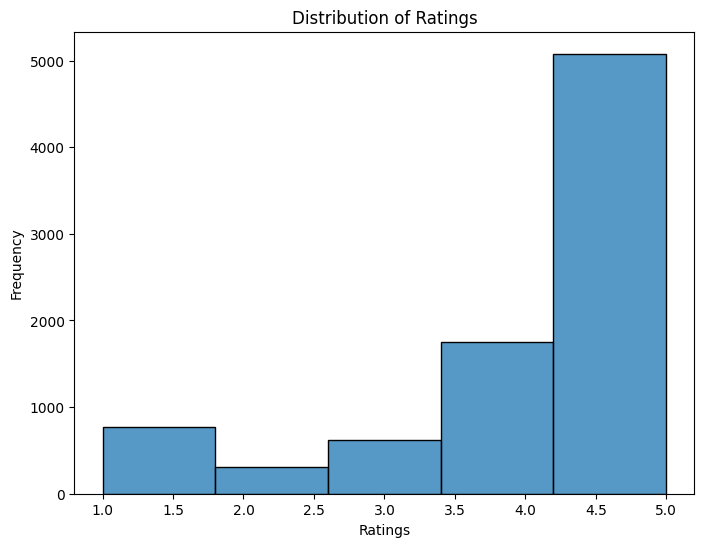

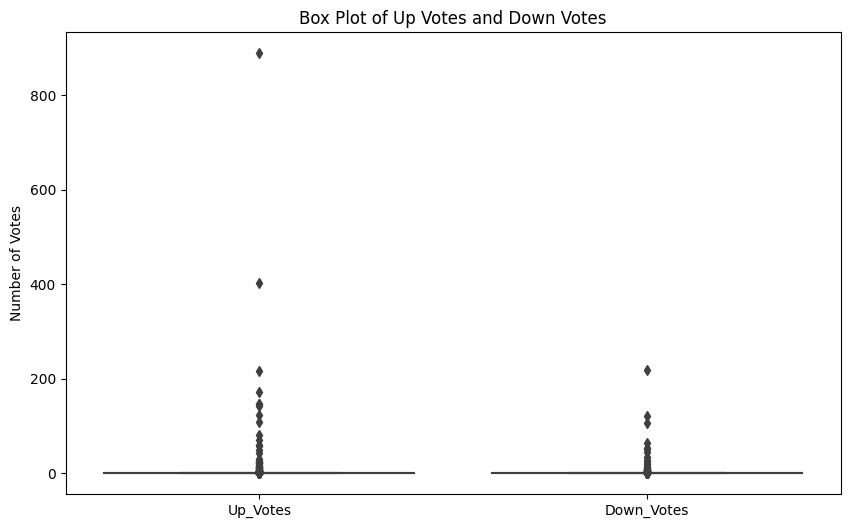

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Box plot of Up Votes and Down Votes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Up_Votes', 'Down_Votes']])
plt.title('Box Plot of Up Votes and Down Votes')
plt.ylabel('Number of Votes')
plt.show()


# Analyzing the Relationship between Ratings and Engagement Metrics:

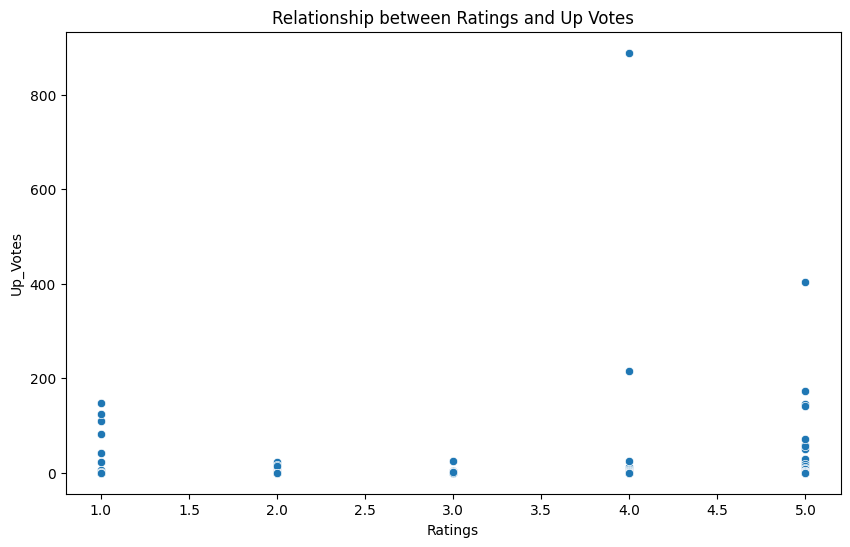

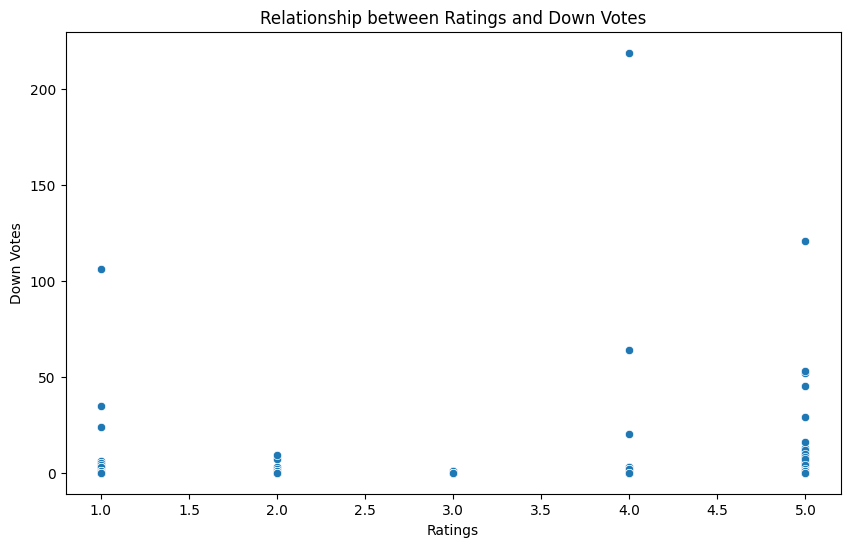

In [18]:
import seaborn as sns

# Scatter plot to visualize the relationship between Ratings and Up Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Up_Votes')
plt.title('Relationship between Ratings and Up Votes')
plt.xlabel('Ratings')
plt.ylabel('Up_Votes')
plt.show()

# Scatter plot to visualize the relationship between Ratings and Down Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Down_Votes')
plt.title('Relationship between Ratings and Down Votes')
plt.xlabel('Ratings')
plt.ylabel('Down Votes')
plt.show()


# Categorical Variable analysis

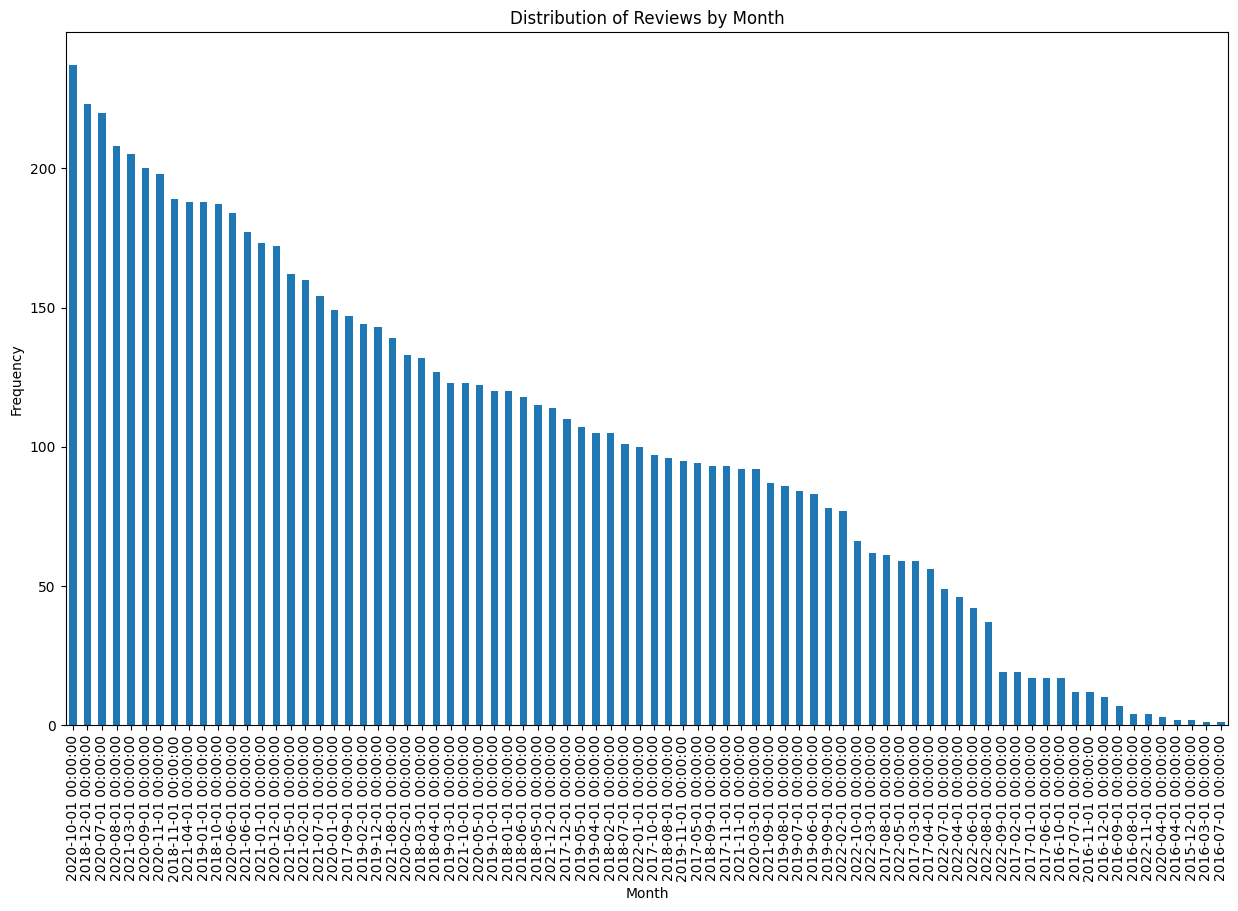

In [19]:
plt.figure(figsize=(15, 9))
df['Month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews by Month')
plt.xticks(rotation=90)
plt.show()


# Sentiment Analysis on text data

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\CHARISHMA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
def get_sentiment_nltk(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Return 'Neutral' for NaN values


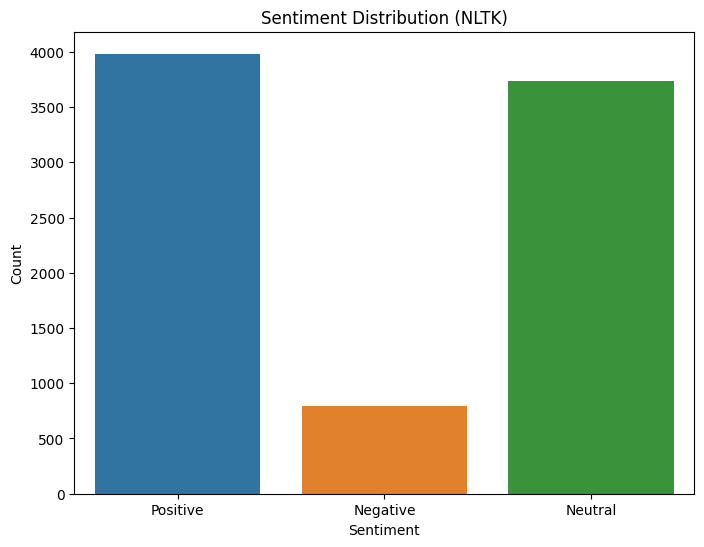

In [22]:
# Apply sentiment analysis to the 'Review_text' column
df['Sentiment_NLTK'] = df['Review_text'].apply(get_sentiment_nltk)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_NLTK', data=df)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Text Data 

In [23]:
# Distribution on target variable looks non-uniform
df['Sentiment_NLTK'].value_counts(normalize=True)

Sentiment_NLTK
Positive    0.467598
Neutral     0.438835
Negative    0.093567
Name: proportion, dtype: float64

In [24]:
# removing the data where we don't want, i.e.'netural'.
df = df[df.Sentiment_NLTK != "Neutral"]

df.shape

(4780, 9)

In [25]:

df['Sentiment_NLTK'].value_counts(normalize=True)

Sentiment_NLTK
Positive    0.833264
Negative    0.166736
Name: proportion, dtype: float64

# Iam choosing Sentiment_NLTK for sentiment analysis

In [26]:
# Define a dictionary to map sentiment categories to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': 0}

# Map sentiment categories to numerical values in the 'Sentiment_NLTK' column
df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)

# Display the updated DataFrame
print(df[['Sentiment_NLTK', 'Sentiment_NLTK_numeric']].head())


  Sentiment_NLTK  Sentiment_NLTK_numeric
0       Positive                       1
1       Negative                       0
2       Negative                       0
3       Positive                       1
4       Positive                       1


C:\Users\CHARISHMA\AppData\Local\Temp\ipykernel_26372\2044379461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)


In [27]:
df.loc[0, 'Review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [28]:
# Let us take only the two columns we need
df = df[["Review_text", "Sentiment_NLTK_numeric"]] 
df.shape

(4780, 2)

# Step 1 - Identify Input and Output

In [29]:
# Step 1: Identify Input and Output

X = df.Review_text # the column text contains textual data to extract features from
y = df.Sentiment_NLTK_numeric # this is the column we are learning to predict. 
print(X.shape, y.shape)

(4780,) (4780,)


# Step 2 - Split the Data into Train and Test

In [30]:
# Step 2: Split the data into train and test

from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3585,) (3585,)
(1195,) (1195,)


# Step 3 - Data Preprocessing on train data (X_train)

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

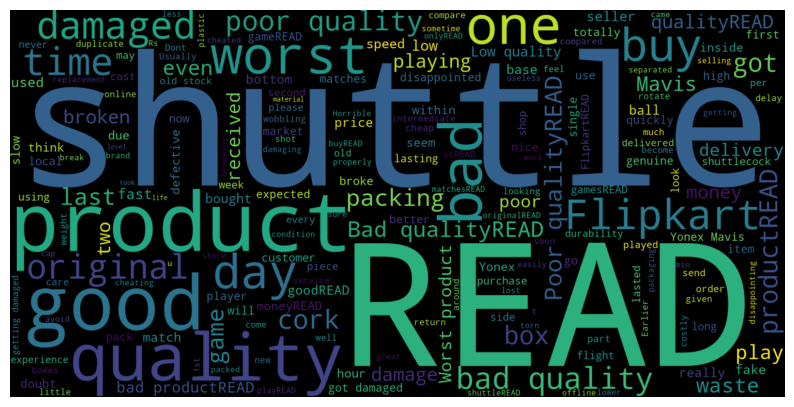

In [32]:
# Import the required modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display word cloud
def display_wordcloud(data):
    # Generate the word cloud with the default font
    wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(data))

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Assuming X_train contains Flipkart review text data
# and y_train contains corresponding sentiment labels
# Display the word cloud for positive sentiment Flipkart reviews
display_wordcloud(X_train[y_train ==0])


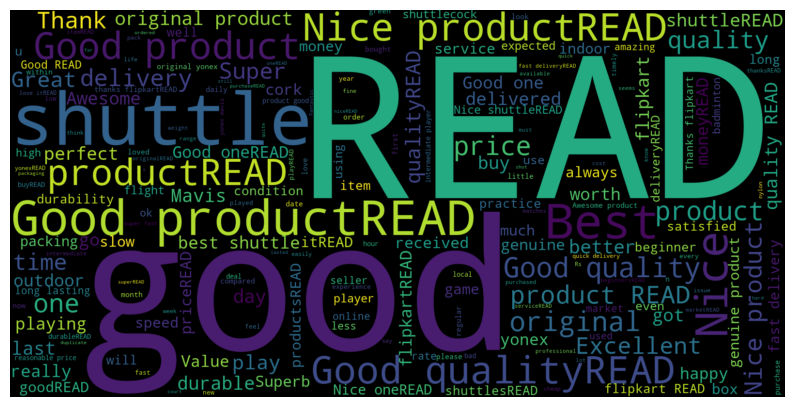

In [33]:
# Display the wordcloud for Flipkart reviews

display_wordcloud(X_train[y_train==1])

In [34]:
# Step 3: Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CHARISHMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [37]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 1.48 s
Wall time: 2.02 s
(3585, 2547)


# Step 4 - Data Preprocessing on test data (X_test) 

In [38]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1195, 2547)


# Step 5 - Building a Model (i.e. Train the classifier)

In [39]:
# Step 5: Building a Model (i.e. Train the classifier)

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 2 ms


MultinomialNB()

# Step 6 - Evaluating on Train Data

In [40]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9617852161785216

In [41]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 503,   99],
       [  38, 2945]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

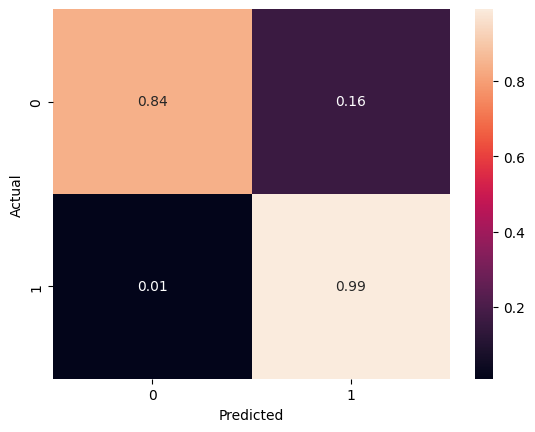

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')


# Step 7 - Evaluate on Test Data

In [43]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9372384937238494

Text(0.5, 23.52222222222222, 'Predicted')

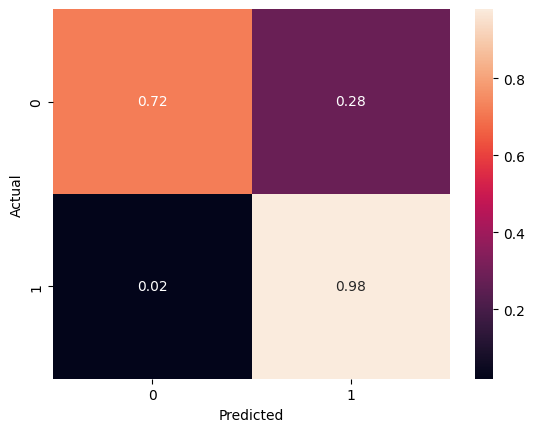

In [44]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [45]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.977268956363033
Test Score (F1 Score): 0.9631087063453025


# clearly we got good result with our model

# Creating an Optimal Workflow

In [46]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [47]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 41.8 s
Wall time: 49.8 s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x00000204B8BDF920>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857143


# Caching to optimize the runtime

In [48]:
import joblib
from joblib import Memory

import os

In [49]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 23.2 s
Wall time: 28.8 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x00000204B8BDF920>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857143


In [50]:
import os
os.getcwd()

'C:\\Users\\CHARISHMA\\Internship'

In [51]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, r'C:\Users\CHARISHMA\Internship\Sentiment Analysis\demo_model_nb.pkl')

['C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\demo_model_nb.pkl']

In [52]:
# Deserialization

model = joblib.load('C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\demo_model_nb.pkl')
new_data = ["""4
Nice product

Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.
Kamal Suresh

Certified Buyer, Chirakkal

Feb, 2021

102775
1
Don't waste your money

They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.
Flipkart Customer

Certified Buyer, Hyderabad

Feb, 2021

19819
1
Did not meet expectations

Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.""","""Good quality product. Delivered on time."""]
prediction = model.predict(new_data)

print("Prediction:", prediction)


Prediction: [0 1]


# Here 1 means 'Positive' and 0 means 'Negative'.

In [53]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: total: 250 ms
Wall time: 280 ms
Test Score (F1): 0.9642857142857143


In [54]:
print("Model Size:", os.path.getsize('C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\demo_model_nb.pkl'), "Bytes")

Model Size: 81990 Bytes


# Implementing Memoization to further improve the runtime
As a software engineer, besides caching, you can employ several techniques to improve the time complexity of your code. Implement memoization to store the results of expensive function calls and reuse them when the same inputs occur again. This is particularly useful for dynamic programming problems.

In [55]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: total: 734 ms
Wall time: 781 ms


In [56]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 234 ms
Wall time: 263 ms


In [57]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 750 ms
Wall time: 1.22 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857143


In [58]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 'C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\demo_model_nb.pkl')

['C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\demo_model_nb.pkl']

In [59]:
# Deserialization

model = joblib.load('C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\demo_model_nb.pkl')
new_data = ["""4
Nice product

Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.
Kamal Suresh

Certified Buyer, Chirakkal

Feb, 2021

102775
1
Don't waste your money

They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.
Flipkart Customer

Certified Buyer, Hyderabad

Feb, 2021

19819
1
Did not meet expectations

Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.""","""Good quality product. Delivered on time."""]
prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [0 1]


In [60]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test_clean)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: total: 0 ns
Wall time: 7 ms
Test Score (F1): 0.9642857142857143


In [61]:
print("Model Size:", os.path.getsize('C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\demo_model_nb.pkl'), "Bytes")

Model Size: 81974 Bytes


# Putting it all together: Implementing various Algorithms to find the Best Model

In [62]:
import warnings

warnings.filterwarnings('ignore')

In [63]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 328 ms
Wall time: 1.62 s
Score on Test Data:  0.9642857142857143
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 7.36 s
Wall time: 8.89 s
Score on Test Data:  0.9601941747572815
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 2min 15s
Wall time: 2min 49s
Score on Test Data:  0.9585621567648527


In [64]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [65]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\{name}.pkl')
    model = joblib.load(f'C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'C:\\Users\\CHARISHMA\\Internship\\Sentiment Analysis\\{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 6.01 ms
Test Score (F1) 0.9642857142857143
Model Size: 81974 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 6.06 ms
Test Score (F1) 0.9601941747572815
Model Size: 114172 Bytes
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 5.84 ms
Test Score (F1) 0.9585621567648527
Model Size: 87625 Bytes


* After the comparison, Even the naive bayes giving best score, It doesnt work well on unseen data
* So I am using logistic regression